Accuracy: 0.9528
Balanced Accuracy: 0.9527
ROC-AUC Score: 0.9983

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      0.97      0.95        36
           2       1.00      0.94      0.97        35
           3       0.97      0.97      0.97        37
           4       1.00      0.94      0.97        36
           5       0.97      0.92      0.94        37
           6       0.97      1.00      0.99        36
           7       1.00      0.97      0.99        36
           8       0.86      0.91      0.89        35
           9       0.85      0.92      0.88        36

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



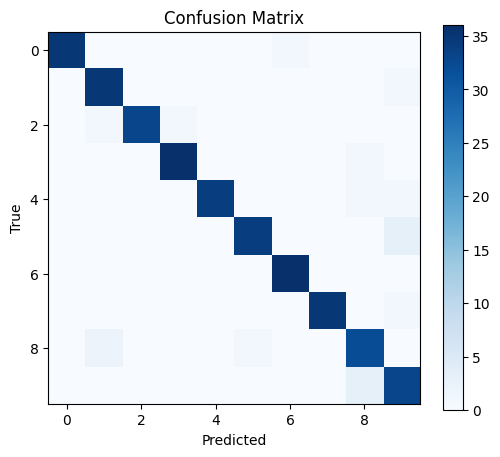

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize 

# loading digit dataset
data_set = datasets.load_digits()
X, Y = data_set.data, data_set.target
Y_bin = label_binarize(Y, classes=np.unique(Y))  

# splitting data
X_train, X_test, Y_train, Y_test, Y_bin_train, Y_bin_test = train_test_split(X, Y, Y_bin, test_size=0.2, random_state=72, stratify=Y)

# hyperparameter tuning
param_grid = [{"solver": ["svd"]}, {"solver": ["lsqr", "eigen"], "shrinkage": ["auto"]}]
grid_search = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, Y_train)  # trains the model with the best parameters


model_lda = grid_search.best_estimator_
pred_lda = model_lda.predict(X_test)
prob_lda = model_lda.predict_proba(X_test)

# differnt evaluation methods
roc_lda = roc_auc_score(Y_bin_test, prob_lda, multi_class='ovr')

print(f"Accuracy: {accuracy_score(Y_test, pred_lda):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(Y_test, pred_lda):.4f}")
print(f"ROC-AUC Score: {roc_lda:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, pred_lda))

# confusionmatrix
plt.figure(figsize=(6, 5))
plt.imshow(confusion_matrix(Y_test, pred_lda), cmap="Blues")
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
